GPU Implementation

In [33]:
import torch

# Whether to train on a gpu
train_on_gpu = torch.cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')

# Number of gpus
if train_on_gpu:
    gpu_count = torch.cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False

CUDA_DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(CUDA_DEVICE)


print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__CUDA Device Name:',torch.cuda.get_device_name(0))
print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)



Train on gpu: True
1 gpus detected.
cuda
__CUDNN VERSION: 8200
__Number CUDA Devices: 1
__CUDA Device Name: NVIDIA GeForce RTX 2080 Ti
__CUDA Device Total Memory [GB]: 11.810832384


In [2]:
import pandas as pd
pd.set_option("display.max_rows", None)

# Part 1 & 2: Dataset Download And Extraction

###### Create train and holdout folders, where each folder has the three classes as subfolders. Discuss in a markdown cell how many images you chose to have in each class' holdout folder. (Note: you can move images into the folders by hand if you don't want to write a script, but make sure you don't have the same images in train and holdout). Make sure all the class names are the same across folders. Now repeat the process for train and validation, so that you have a train, validation, and holdout folders at the same directory level. Discuss how/why you chose what's in your holdout.	5 points

Image Count Discussion:
<br>
I started by setting the number of training images to the number used in the paper (http://vision.stanford.edu/aditya86/ImageNetDogs/)  Although they used the full remainder of the balance of the images for testing, I wanted some for holdout validation and so split the remainder roughly in half between validation and holdout.

In [29]:
import os, shutil
import random

directory = '/Users/samodle/Documents/Repos/SimpleMachineLearningProjects/CNNs and Transfer Learning/Images/'

num_training_images_per_breed = 100
num_test_images_per_breed = 25
source_paths = ['n02109047-Great_Dane', 'n02094258-Norwich_terrier', 'n02094114-Norfolk_terrier']
destination_paths = ['train/', 'test/', 'holdout/']

dest_train = 0
dest_test = 1
dest_holdout = 2

for path in destination_paths:
    if not os.path.exists(directory + path):
      # Create a new directory because it does not exist
      os.makedirs(directory + path)
      print(f'Directory Created: {path}')
    else:
        print(f'Already Exists: {path}')

    if not os.path.exists(directory + path + 'great_dane/'):
        os.makedirs(directory + path + 'great_dane/')
        print(f'Directory Created: {path}')

    if not os.path.exists(directory + path + 'norwich_terrier/'):
        os.makedirs(directory + path + 'norwich_terrier/')

    if not os.path.exists(directory + path + 'norfolk_terrier/'):
        os.makedirs(directory + path + 'norfolk_terrier/')
        print(f'Directory Created: {path}')



Directory Created: train/
Directory Created: train/
Directory Created: train/
Directory Created: test/
Directory Created: test/
Directory Created: test/
Directory Created: holdout/
Directory Created: holdout/
Directory Created: holdout/


In [30]:
# split up the training, holdout, and test datasets
for path in source_paths:
    all_files = os.listdir(directory + path)

    #split out the training data
    train = random.sample(all_files, num_training_images_per_breed)

    if 'Great_Dane' in path:
        for f in train:
            shutil.copy(directory + path + '/' + f, directory + destination_paths[dest_train] + 'great_dane/')
    elif 'Norwich' in path:
         for f in train:
            shutil.copy(directory + path + '/' + f, directory + destination_paths[dest_train] + 'norwich_terrier/')
    elif 'Norfolk' in path:
        for f in train:
            shutil.copy(directory + path + '/' + f, directory + destination_paths[dest_train] + 'norfolk_terrier/')


    test_and_hold = [x for x in all_files if x not in train]
    # print(train)

    #split the test from the holdout
    test = random.sample(test_and_hold, num_test_images_per_breed)

    if 'Great_Dane' in path:
        for f in test:
            shutil.copy(directory + path + '/' + f, directory + destination_paths[dest_test] + 'great_dane/')
    elif 'Norwich' in path:
         for f in test:
            shutil.copy(directory + path + '/' + f, directory + destination_paths[dest_test] + 'norwich_terrier/')
    elif 'Norfolk' in path:
        for f in test:
            shutil.copy(directory + path + '/' + f, directory + destination_paths[dest_test] + 'norfolk_terrier/')


    holdout = [x for x in test_and_hold if x not in test]
    if 'Great_Dane' in path:
        for f in holdout:
            shutil.copy(directory + path + '/' + f, directory + destination_paths[dest_holdout] + 'great_dane/')
    elif 'Norwich' in path:
         for f in holdout:
            shutil.copy(directory + path + '/' + f, directory + destination_paths[dest_holdout] + 'norwich_terrier/')
    elif 'Norfolk' in path:
        for f in holdout:
            shutil.copy(directory + path + '/' + f, directory + destination_paths[dest_holdout] + 'norfolk_terrier/')

    print(test)
    print(holdout)


['n02109047_28208.jpg', 'n02109047_25342.jpg', 'n02109047_9503.jpg', 'n02109047_9604.jpg', 'n02109047_28433.jpg', 'n02109047_1876.jpg', 'n02109047_6265.jpg', 'n02109047_4267.jpg', 'n02109047_6680.jpg', 'n02109047_7072.jpg', 'n02109047_7156.jpg', 'n02109047_31274.jpg', 'n02109047_12678.jpg', 'n02109047_23852.jpg', 'n02109047_13868.jpg', 'n02109047_2851.jpg', 'n02109047_31117.jpg', 'n02109047_875.jpg', 'n02109047_23058.jpg', 'n02109047_2553.jpg', 'n02109047_33588.jpg', 'n02109047_1672.jpg', 'n02109047_5618.jpg', 'n02109047_17629.jpg', 'n02109047_2630.jpg']
['n02109047_8090.jpg', 'n02109047_6447.jpg', 'n02109047_13016.jpg', 'n02109047_20023.jpg', 'n02109047_26860.jpg', 'n02109047_25603.jpg', 'n02109047_24340.jpg', 'n02109047_2859.jpg', 'n02109047_18490.jpg', 'n02109047_2527.jpg', 'n02109047_5936.jpg', 'n02109047_33029.jpg', 'n02109047_22481.jpg', 'n02109047_21567.jpg', 'n02109047_13072.jpg', 'n02109047_94.jpg', 'n02109047_3001.jpg', 'n02109047_5910.jpg', 'n02109047_13730.jpg', 'n02109047_

###### Define a list of image transformations to be used during training, passing them to transforms.Compose(). <br> Discuss why you think these transformations might help.

In [34]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.Resize(size=[224,224]),
    transforms.RandomRotation(degrees=90),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])  # Imagenet standards
])


The training transforms will both augment the training dataset and prepare the images for the model.  Transformations such as the color jitter, rotation and flipping all create additional images for the model to learn off of.  Transformations like normalization and converting the image to tensors are there to prepare the data for model intake.  Resize is also there to keep the number of features at a reasonable level for this exercise (and also to line up with the imagenet models)/

###### Repeat the step above for test and validation transformations.

In [35]:
test_transforms = transforms.Compose([
        transforms.Resize(size=[224,224]),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ])

valid_transforms = transforms.Compose([
        transforms.Resize(size=[224,224]),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ])


###### Correctly set up DataLoaders for the three folders (train, validation, holdout). <br> Discuss what options you chose for these loaders, and why (including batch size, shuffling, and dropping last).

I plan to experiment wth these parameters as we go. To get started, I'm using Workers = 4 and Batch Size = 4 because these numbers are similar to homework 7 and are what they use in the pytorch docs (https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)  Shuffling intuitively makes sense as we plan to feed these images through several times.  Dropping last is true initially as this is a small dataset and I don't want to give equal weight to a potentially small sample.

In [36]:
import torch.utils.data as data
import torchvision

BATCH_SIZE = 4
WORKERS = 4
DROP = False

TRAIN_DATA_PATH = "./images/train/"
TEST_DATA_PATH = "./images/test/"
HOLDOUT_DATA_PATH = "./images/holdout/"

train_data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=train_transforms)
train_data_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True,  num_workers=WORKERS, drop_last=DROP)

test_data = torchvision.datasets.ImageFolder(root=TEST_DATA_PATH, transform=test_transforms)
test_data_loader  = data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=WORKERS, drop_last=DROP)

holdout_data = torchvision.datasets.ImageFolder(root=HOLDOUT_DATA_PATH, transform=test_transforms)
holdout_data_loader  = data.DataLoader(holdout_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=WORKERS, drop_last=DROP)


['great_dane', 'norfolk_terrier', 'norwich_terrier']


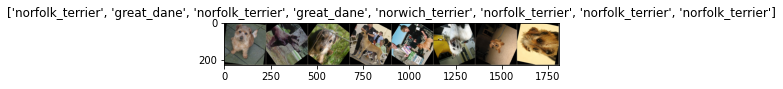

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class_names = train_data.classes
print(class_names)

#source: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(train_data_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

# Part 3: Data model setup
##### Instantiate any pre-trained ImageNet model. Discuss why you chose it amongst the others.

I chose vgg19 because I had experience with vgg16 which is a pretty safe pick for imagenet classification and the '19' version seems to be a potentially more powerful version of the '16'

In [37]:
from torch import nn, optim
import pandas as pd
from timeit import default_timer as timer

model = torchvision.models.vgg19(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\Samuel/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth
4.3%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

17.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

32.9%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_m

##### Write code to freeze/unfreeze the pretrained model layers.
##### Replace the head of the model with sequential layer(s) to predict our three classes.

In [38]:
n_classes = 3

# Freeze early layers
for param in model.parameters():
    param.requires_grad = False
n_inputs = model.classifier[6].in_features

# Add on classifier
# modified from: https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce
model.classifier[6] = nn.Sequential(
                      nn.Linear(n_inputs, 256),
                      nn.ReLU(),
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),
                      nn.LogSoftmax(dim=1))

print(model.classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Sequential(
    (0): Linear(in_features=4096, out_features=256, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=256, out_features=3, bias=True)
    (4): LogSoftmax(dim=1)
  )
)


###### What activation function did you use in the step above? Why?
I chose logsoftmax for the activation function. I read (https://cs231n.github.io/neural-networks-case-study/) it has better/more efficient gradient decent and there may be advantages to using log probabilities over the probabilities from just using softmax.
###### Did you use dropout in the step above? Why or why not?
I did use dropout in the step above because with relatively few images I thought it would be a good time to try to leverage dropout to prevent overfitting of the data.
###### Did you use batch normalization in the step above? Why or why not?
I breifly experimented with batch normalization when I first did this using vgg16 and found it didnt seem to make a difference (using this code: https://www.machinecurve.com/index.php/2021/03/29/batch-normalization-with-pytorch/). It also seemed like having only a few images would make batch normalization a great tool to prevent individual outlier images from overly impacting the weights of the section we are training here. (Especially since there are some outliers like the wet dog)

###### Choose and instantiate an optimizer. Discuss your choice.

I chose to use AdamW, based off of the original Adam (paper: https://arxiv.org/abs/1412.6980) as my optimizer.  I've used Adam before and found it to be a good general purpose optimizer, however I wanted to try AdamW as I read it is supposed to generalize better because weight decay is performed only after controlling the parameter-wise step size.
###### Choose and instantiate a loss function. Discuss your choice.
For this paper I considered the Negative Log Likelihood loss as well as the Cross Entropy Loss. I believe both will work well for this classification task, I went with Cross Entropy as I have a hunch the harsher penalities with the NLL may make it difficult for this dog breed identification.

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=.001)

###### Write code that places the model on the GPU, if it exists, otherwise using the CPU.

In [39]:
# Move to gpu and parallelize
if train_on_gpu:
    model = model.to('cuda')

if multi_gpu:
    model = nn.DataParallel(model)


# Part 4: Training your model
###### Correctly set up your model to train over 20 epochs, Correctly set up your model to use your batches for training, Correctly make predictions with your model (the predictions can be wrong).
###### Correctly call your loss function and back-propagate its results, Use the optimizer correctly to update weights/gradients, Correctly record training losses for each epoch.
###### Correctly set up validation at each epoch, Correctly record validation losses for each epoch, Correctly record training and validation accuracies for each epoch
###### Write code that places the model on the GPU, if it exists, otherwise using the CPU.

In [41]:
def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          save_file_name,
          max_epochs_stop=3,
          n_epochs=20,
          print_every=1):
    """Train a PyTorch Model

    Params
    --------
        model (PyTorch model): cnn to train
        criterion (PyTorch loss): objective to minimize
        optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
        train_loader (PyTorch dataloader): training dataloader to iterate through
        valid_loader (PyTorch dataloader): validation dataloader used for early stopping
        save_file_name (str ending in '.pt'): file path to save the model state dict
        max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
        n_epochs (int): maximum number of training epochs
        print_every (int): frequency of epochs to print training stats

    Returns
    --------
        model (PyTorch model): trained cnn with best weights
        history (DataFrame): history of train and validation loss and accuracy
    """

    # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf

    valid_max_acc = 0
    history = []

    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    overall_start = timer()

    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()
        start = timer()

        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            # Tensors to gpu
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            # Clear gradients
            optimizer.zero_grad()
            # Predicted outputs are log probabilities
            output = model(data)

            # Loss and backpropagation of gradients
            loss = criterion(output, target)
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))
            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            # Track training progress
            print(
                f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
                end='\r')

        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():
                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    if train_on_gpu:
                        data, target = data.cuda(), target.cuda()

                    # Forward pass
                    output = model(data)

                    # Validation loss
                    loss = criterion(output, target)
                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(
                        correct_tensor.type(torch.FloatTensor))
                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)

                # Calculate average losses
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                # Calculate average accuracy
                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                history.append([train_loss, valid_loss, train_acc, valid_acc])

                # Print training and validation results
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )

                # Save the model if validation loss decreases
                if valid_loss < valid_loss_min:
                    # Save model
                    torch.save(model.state_dict(), save_file_name)
                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                        total_time = timer() - overall_start
                        print(
                            f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                        )

                        # Load the best state dict
                        model.load_state_dict(torch.load(save_file_name))
                        # Attach the optimizer
                        model.optimizer = optimizer

                        # Format history
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'valid_loss', 'train_acc',
                                'valid_acc'
                            ])
                        return model, history

    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
    total_time = timer() - overall_start
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
    )
    print(
        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch):.2f} seconds per epoch.'
    )
    # Format history
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])
    return model, history

In [42]:
model, history = train(
    model,
    criterion,
    optimizer,
    train_data_loader,
    test_data_loader,
    save_file_name='dog_id_model',
    max_epochs_stop=20,
    n_epochs=45,
    print_every=2)

Starting Training from Scratch.

poch: 1	5.33% complete. 1.34 seconds elapsed in epoch.Epoch: 1	16.00% complete. 1.56 seconds elapsed in epoch.Epoch: 1	30.67% complete. 1.78 seconds elapsed in epoch.Epoch: 1	45.33% complete. 1.98 seconds elapsed in epoch.Epoch: 1	60.00% complete. 2.19 seconds elapsed in epoch.Epoch: 1	74.67% complete. 2.40 seconds elapsed in epoch.Epoch: 1	89.33% complete. 2.60 seconds elapsed in epoch.
Epoch: 1 	Training Loss: 0.5012 	Validation Loss: 0.2293
		Training Accuracy: 75.00%	 Validation Accuracy: 92.00%
poch: 3	5.33% complete. 1.30 seconds elapsed in epoch.Epoch: 3	20.00% complete. 1.51 seconds elapsed in epoch.Epoch: 3	34.67% complete. 1.71 seconds elapsed in epoch.Epoch: 3	49.33% complete. 1.92 seconds elapsed in epoch.Epoch: 3	64.00% complete. 2.13 seconds elapsed in epoch.Epoch: 3	78.67% complete. 2.33 seconds elapsed in epoch.Epoch: 3	93.33% complete. 2.54 seconds elapsed in epoch.
Epoch: 3 	Training Loss: 0.4774 	Validation Loss: 0.2328
		Training Acc

# Part 5: Model evaluation
##### Graph training versus validation loss using matplotlib.pyplot (or other). Was your model overfitting, underfitting, or neither?	5 points
It is neither - if it was overfit we would expect to see low training loss and high validation loss which is not the case. It could be underfit as the training loss is high but the validation loss is lower.

Text(0.5, 1.0, 'Training and Validation Losses')

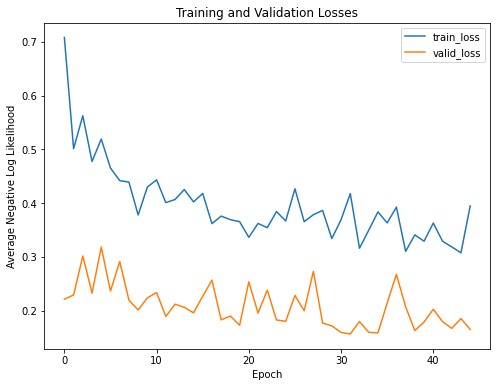

In [43]:

plt.figure(figsize=(8, 6))
for c in ['train_loss', 'valid_loss']:
    plt.plot(
        history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Negative Log Likelihood')
plt.title('Training and Validation Losses')


##### Make a list of reasons why your model may have under-performed.	5 points
- Suboptimal parameters:  without doing parameter optimization like the gridsearch we did with the decision trees, it is likely better parameters could have been chosen for the model.
- Not enough images:  Ideally, we would have had much larger training, testing, and holdout datasets to ensure the results will generalize better.
- More time to train could lead to better results.
##### Make a list of ways you could improve your model performance (you don't have to implement these unless you wan to).
- Sucessfully implementing batch normalization would improve the weights in the layers we were training.
- Training a larger portion of the vgg-19 model's weights on the dog data may have improved performance.


##### Graph training versus validation accuracy using matplotlib.pyplot (or other). Score your model on its predictions on the holdout. Discuss why you think your results will or will not generalize.
Although the results ended up being better than I expected after the results from the last homework, I don't think the model has seen enough data in order to generalize across more dog breeds without retraining.  I think it would do reasonably well if it were to be asked to continue to it's current task with a broader dataset because there was a bit of variation in the sample.

Text(0.5, 1.0, 'Training and Validation Accuracy')

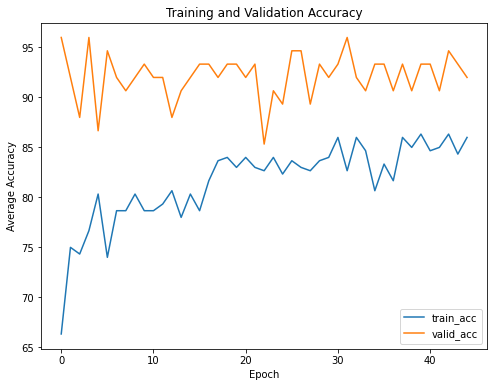

In [44]:
plt.figure(figsize=(8, 6))
for c in ['train_acc', 'valid_acc']:
    plt.plot(
        100 * history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Training and Validation Accuracy')


In [32]:
holdout_loss = 0.0
holdout_acc = 0

#test_loader.dataset.t

with torch.no_grad():
    # Set to evaluation mode
    model.eval()

    # Validation loop
    for data, target in holdout_data_loader:
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()

        # Forward pass
        output = model(data)

        # Validation loss
        loss = criterion(output, target)
        # Multiply average loss times the number of examples in batch
        holdout_loss += loss.item() * data.size(0)

        # Calculate validation accuracy
        _, pred = torch.max(output, dim=1)
        correct_tensor = pred.eq(target.data.view_as(pred))
        accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
        # Multiply average accuracy times the number of examples
        holdout_acc += accuracy.item() * data.size(0)

    # Calculate average losses
    holdout_loss = holdout_loss / len(holdout_data_loader.dataset)

    # Calculate average accuracy
    holdout_acc = holdout_acc / len(holdout_data_loader.dataset)
    holdout_acc = round(holdout_acc*100, 2)

print(f'Holdout Accuracy: {holdout_acc}%')


Holdout Accuracy: 91.3%


# Extra Credit
The 'Novel dataset for Fine-Grained Image Categorization' paper begins by explaining both the challenges and importance of fine-grained image categorization before explaining this Stanford Dog dataset and providing training and testing recommendations.  The training and testing recommendations were useful and provided a nice baseline for my own project 2 implementation.  The way they gathered the data via imagenet then Mechanical Turk for validation makes sense but made me wonder if a partnership with a company like Rover or Wag (that has millions of dog pictures that have been labeled with breed and age information by their owners) would be ideal for a larger-scale version of this project.  One of the benefits of this dataset is the large number of classes (in this case dog breeds).  If we had had more time here it would be interesting to try different models on larger combinations of dog breeds.